<a href="https://colab.research.google.com/github/barauna-lo/Colored_Noise/blob/main/RNN_PSD_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
#!pip install colorednoise
import colorednoise as cn
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
tf.random.set_seed(42)
import seaborn as sns
sns.set_style('darkgrid')

$$
Ftt = \sum a_i \sin(2k\pi)+ i b_i \cos(2k\pi)\\
PSD = (a_i + b_i)(a_i-b_i)\\
PSD = a^2 + b^2\\
S_h = {\sum PSD_i \log(PSD_i) \over \log\left(\frac{1}{N}\right)}
$$

were $b$ in the imaginarius parte

In [184]:
def entropyShannon(data,norm=True):
  cdata = tf.cast(data,tf.complex128) #tf complex 128 format
  cdata = tf.signal.fft(cdata) #Fast Fourrie Transformation
  cdata = cdata*tf.math.conj(cdata) #PSD Calculation
  cdata = cdata[:len(cdata)//2] #Take only haf
  cdata = cdata/tf.math.reduce_sum(cdata) #Normalização???
  sh = cdata*tf.math.log(cdata) # Calculate Shannon entropy p1
  sh = tf.math.real(tf.math.reduce_sum(sh)) #Calculate Shannon entropy p2
  if norm == True: #Normalize?
    norm = tf.cast(tf.math.log(1.0/tf.cast(len(cdata),tf.float64) ),tf.float64)
    return cdata, sh/norm
  else:
    return cdata, -sh

def beta(data):
  psd = tf.cast(data,tf.complex128) #tf complex 128 format
  psd = tf.signal.fft(psd) #Fast Fourrie Transformation
  psd = psd*tf.math.conj(psd) #PSD Calculation
  freq = np.fft.fftfreq(len(data))
  n = len(data)//2
  psd = psd[1:n] #Take only haf
  freq =  tf.convert_to_tensor(freq[1:n])
  psd = tf.cast(tf.math.log(psd), tf.float64)
  freq = tf.cast(tf.math.log(freq),tf.float64)
  #print(np.array(freq),np.array(psd))
  beta, _ =np.polyfit(np.array(freq),np.array(psd),deg=1)
  return -beta



def diffEntropy(d1,d2):
  _, sh1 = entropyShannon(d1)
  _, sh2 = entropyShannon(d2)
  return (sh1-sh2)**2

In [192]:
np.log2(1e5)

16.609640474436812

In [208]:
for i in range(2,24):
  print(i,2**i,beta(cn.powerlaw_psd_gaussian(2, 2**i))-beta(cn.powerlaw_psd_gaussian(2, 2**i)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


2 4 -0.6856697314317953
3 8 2.3031786221141552
4 16 1.0570225107933207
5 32 -0.16704801888906484
6 64 0.05292889823464031
7 128 -0.025818660840685626
8 256 -0.06716122922191436
9 512 -0.27485384693417236
10 1024 -0.10625061447592987
11 2048 -0.08192761215779543
12 4096 0.039167061204884224
13 8192 0.023011832930471154
14 16384 -0.009473135206186978
15 32768 -0.01626906642016701
16 65536 0.017635331093437623
17 131072 0.0013273040621841758
18 262144 0.0029409898850900618
19 524288 -0.008455762193643634
20 1048576 0.002560624898214847
21 2097152 -0.0009886437415780325
22 4194304 -0.0009066188390869367
23 8388608 -0.0006485401120679413


In [161]:
res = []
size = 2**15
for i in range(100):
  shd = diffEntropy(cn.powerlaw_psd_gaussian(2, size), cn.powerlaw_psd_gaussian(0,  size))
  res.append(np.array(shd))
res = np.array(res)
print(res)
print(np.average(res),np.std(res))

[0.56983419 0.54388378 0.70459757 0.64628756 0.75769347 0.5780994
 0.49918673 0.6996578  0.71504324 0.66397612 0.58512611 0.73575794
 0.6896464  0.65556502 0.46497188 0.6035783  0.61985417 0.56969582
 0.63145061 0.59476357 0.68738186 0.68249272 0.65642041 0.63995277
 0.70873089 0.79259688 0.61802311 0.63800009 0.53034856 0.80442065
 0.49454956 0.66707494 0.52091457 0.65753582 0.6479038  0.60569327
 0.75780332 0.63102194 0.66897691 0.6373672  0.46494427 0.68406684
 0.75682193 0.6815737  0.77759016 0.6335256  0.71633262 0.56731703
 0.63580853 0.66230564 0.59559653 0.67638734 0.7065101  0.73781093
 0.70450115 0.68630919 0.63797961 0.62912596 0.67126134 0.68173548
 0.62883696 0.55553915 0.70902607 0.46785252 0.69293586 0.76246126
 0.62657069 0.45864566 0.52749315 0.62812284 0.54044729 0.78315999
 0.66025307 0.65257355 0.61843542 0.5076456  0.5919913  0.52807466
 0.60522719 0.61114951 0.52007189 0.62389877 0.54968132 0.65085142
 0.6687005  0.58575177 0.68963234 0.70231543 0.68203868 0.66670

In [143]:
diffEntropy(cn.powerlaw_psd_gaussian(2, len(x)), cn.powerlaw_psd_gaussian(2, len(x)))

<tf.Tensor: shape=(), dtype=float64, numpy=0.001696873658350243>

In [68]:
x = np.random.rand(128)
xn = entropyShannon(x)

tf.Tensor((1.0000000000000002+0j), shape=(), dtype=complex128)


In [73]:
A = cn.powerlaw_psd_gaussian(2, len(x))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


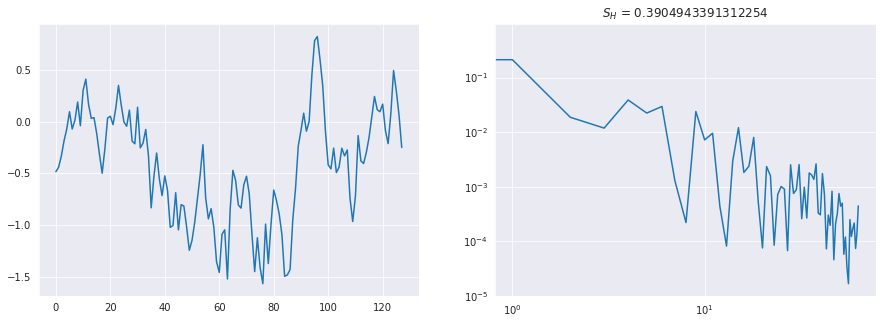

In [101]:
psd, sh = entropyShannon(A)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(A)

plt.subplot(1,2,2)
plt.loglog(psd)
plt.title(r"$S_H$ = "+str(np.array(sh)))
plt.show()

In [103]:
wn = cn.powerlaw_psd_gaussian(0, len(x))

In [ ]:
serie = [1,2,3,4,5,6,7,8,9,0,1,2,3,4,6,7]

x_trai = [1,2,3]
y_pred ~ [3.5]
y_trai = [4]

erro =

----

x_train = [1,2,3]
y_predi = [3.5,4.5,6]
y_true  = [4,5,6]
beta_pr = beta(y_predi)
beta_tr = beta(true)

y_train ( beta(y_true))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


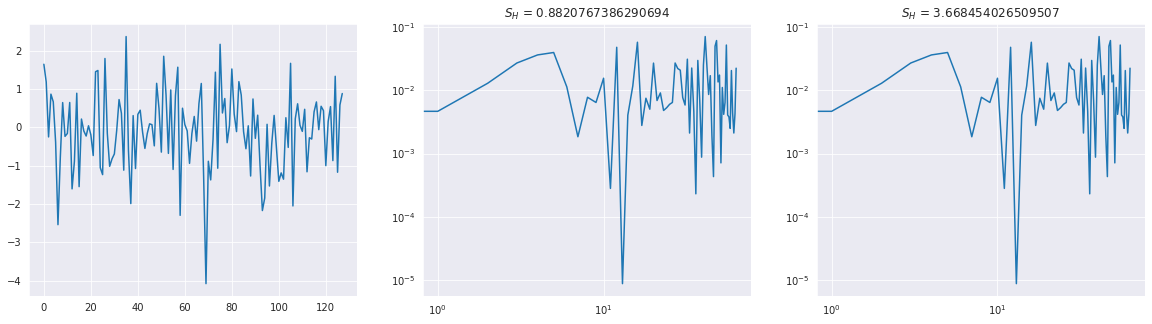

In [107]:
psd, sh = entropyShannon(wn,True)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(wn)

plt.subplot(1,3,2)
plt.loglog(psd)
plt.title(r"$S_H$ = "+str(np.array(sh)))


psd, sh = entropyShannon(wn,False)
plt.subplot(1,3,3)
plt.loglog(psd)
plt.title(r"$S_H$ = "+str(np.array(sh)))


plt.show()

In [ ]:
import matplotlib as mpl

In [133]:
np.random.rand(10,2,3).shape


(10, 2, 3, 4)

In [137]:
def generate_time_series2(batch_size, n_steps,weigth1=0.5,weigth2=0.2,weigth3=0.1):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = weigth1 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += weigth2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += weigth3 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [140]:
generate_time_series2(10,100).shape

(10, 100, 1)

In [114]:
def generate_time_series2(batch_size, n_steps,weigth1=0.5,weigth2=0.2,weigth3=0.1,output_len=1):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, output_len)
    time = np.linspace(0, 1, n_steps)
    series = weigth1 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += weigth2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += weigth3 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")    

In [257]:
#Generate data
n_steps = 100
n_predic = 100
series = generate_time_series2(10000, n_steps + n_predic,weigth2=0,weigth3=0)
#Split into Validation test
X_train, y_train = series[:7000,:n_steps], series[:7000, n_steps:]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -n_predic]
X_test, y_test = series[9000:, :n_steps], series[9000:, -n_predic]

In [317]:
def create_dataset(dataset, window_in=10,window_ou=10):
	'''
  This function will contain two vectors, dataX and dataY, the dataX will contain a set of numbers within the time series
  and the dataY will be its posterior value
  For example:
  list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  if the look_back is equal to 3 we will have
  dataX[0] = [0,1,2] ; dataY[0] = [3]
  dataX[1] = [1,2,3] ; dataY[1] = [4]
  dataX[2] = [2,3,4] ; dataY[2] = [5]
  dataX[3] = [3,4,5] ; dataY[3] = [6]
	'''
	dataX, dataY = [], []
	for i in range(0,len(dataset)-window_in-window_ou+1,1):
		dataX.append(dataset[i:(i+window_in), 0])
		dataY.append(dataset[i + window_in:i + window_in + window_ou, 0])
	return np.array(dataX), np.array(dataY)


In [318]:
n_steps = 100
n_predic = 10
series = generate_time_series2(10000, n_steps + n_predic,weigth2=0,weigth3=0)
x,y = create_dataset(series[0],n_steps,n_predic)

In [334]:
def plot_test(x_,y_):
  empty = np.empty_like(x_)
  empty[:] = np.nan
  y2 = np.append(empty,y_)
  plt.plot(x_)
  plt.plot(y2)
  #plt.show()

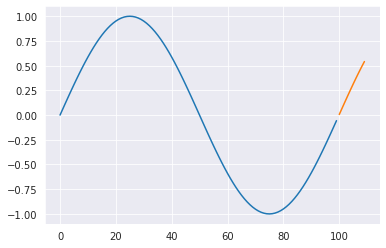

In [331]:
b = np.linspace(0,2*np.pi,1000)
serie = np.sin(10*b)  
serie = serie.reshape(len(serie),1)
x,y = create_dataset(serie,100,10)



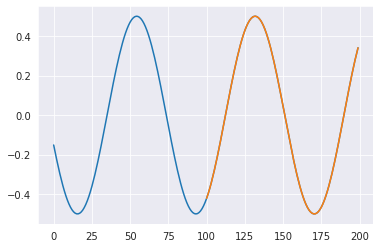

In [260]:
x1,y1 = plot_test(x,y)



plt.plot(series[0])
plt.plot(luan)
#plt.xlim(98,112)
plt.show()


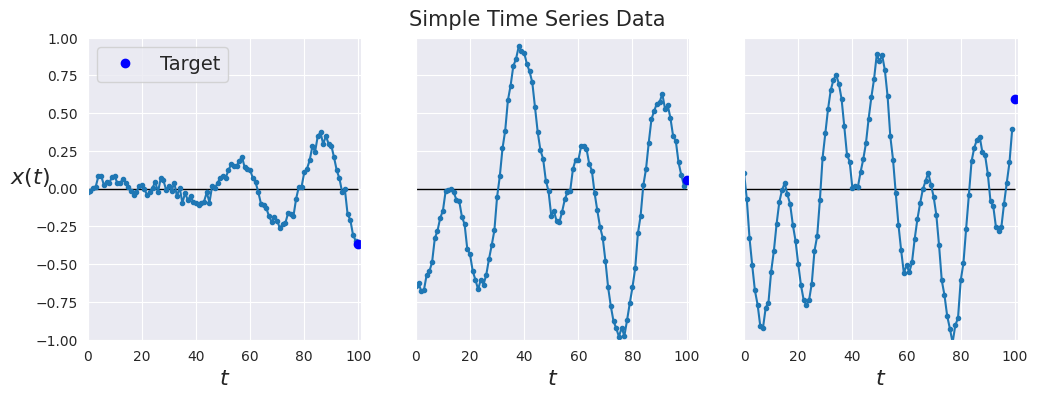

In [217]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4),dpi=100)
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
plt.suptitle('Simple Time Series Data',  y=0.90, horizontalalignment='center', verticalalignment='bottom', fontsize = 15)
#plt.savefig('P5_Predic_01_data.png',bbox_inches='tight') 
plt.show()